In [1]:
import sys
sys.path.insert(0, '../')
from lib import *

from scipy.stats import norm
from scipy.optimize import curve_fit


import SBNDstyle
import matplotlib.pyplot as plt
plt.style.use('../SBND.mplstyle')


# iminuit stuff
# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# our line model, unicode parameter names are supported :)
def line(x, m, x0):
    return  m * (x - x0)


Bad value in file '../SBND.mplstyle', line 40 ('axes.prop_cycle: cycler("color", ["#E7004C", "#FF9664","#005A8F","#00BBCC","#00CE7C","#3BD4AE","#A1DED2","#8B6969","#DAA8E2",])'): Key axes.prop_cycle: 'cycler("color", ["' is not a valid cycler construction: EOL while scanning string literal (<string>, line 1)


# SiPMs

## Each sensor, all Weeks

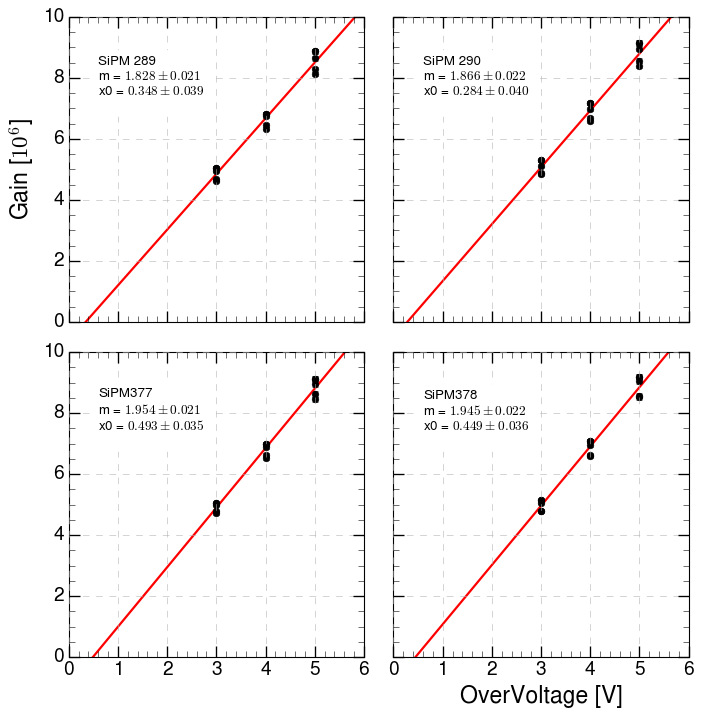

In [44]:

i=0;

fig,axs=plt.subplots(2, 2, figsize=(10, 10),sharex=True,sharey=True,gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

SiPMs_name=["SiPM 289","SiPM 290","SiPM377", "SiPM378"]

WEEKS= [
    "APSAIA_VUV",
    "APSAIA_VUV_2",
    "APSAIA_VIS",
    "DAPHNE_VUV",
    "DAPHNE_VIS",
    ]
markers=["o","s","^",">","<"]

for ch in [0,1,2,3]:

    
    # plt.subplot(2, 2, i)
    aux_OV   =[]
    aux_gain =[]
    
    for week,mark in zip(WEEKS,markers):
        
        OVs=[3,4,5]
        gains=[ GetGains(week,ch,OV,"GAIN")/1e6 for OV in OVs]

        for ov, gain in zip(OVs,gains):
            aux_OV.append(ov)
            aux_gain.append(gain)
        

    # Perform linear regression

    coeffs = np.polyfit(aux_OV, aux_gain, 1)
    
    # xs=range(6)
    # line = np.polyval(coeffs, xs)
    # x_intercep=-coeffs[1]/coeffs[0]

    data_x = np.array(aux_OV)
    data_y = np.array(aux_gain)
    data_yerr =data_y*0.01 #all calib data are equal or below 1% error

    least_squares =  LeastSquares(data_x, data_y, data_yerr, line)

    m = Minuit(least_squares, m=1, x0=0.2)  # starting values

    m.migrad()  # finds minimum of least_squares function
    m.hesse()   # accurately computes uncertainties

    # draw data and fitted line

    # display legend with some fit info
    fit_info = [SiPMs_name[i]+"\n"];
    # fit_info .append( # f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} = {m.fmin.reduced_chi2:.1f} \n")#chi2 is shit for all runs combined

    for p, v, e in zip(m.parameters, m.values, m.errors):
        fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$ \n")

# plt.legend(title="\n".join(fit_info), frameon=True, loc="upper left",numpoints=1)

    axs[int(i/2),i%2].errorbar(data_x, data_y, data_yerr, fmt="ok") 
    # plot(aux_OV,aux_gain,'x',color="black")
    xs=np.arange(0,7)
    axs[int(i/2),i%2].plot(xs, line(xs, *m.values),color="red", label="Linear Fit")
    
    # axs[int(i/2),i%2].plot(xs, line,color="red", label="Linear Fit")
    # axs[int(i/2),i%2].text(0.1, 0.7, SiPMs_name[i]+ f"\nSlope={coeffs[0]:.2f} "+"\n$x_{y=0}$"+f"={x_intercep:.2f}", fontsize=12, transform=axs[int(i/2),i%2].transAxes, bbox=dict(facecolor='white',edgecolor="white") )
    axs[int(i/2),i%2].text(0.1, 0.7, "".join(fit_info), fontsize=12, transform=axs[int(i/2),i%2].transAxes, bbox=dict(facecolor='white',edgecolor="white") )
    
    axs[int(i/2),i%2].grid("both")
    # axs[int(i/2),i%2].legend()
    i+=1;
plt.xlim(0,6)
plt.ylim(0,10)
plt.xlabel("OverVoltage [V]")
axs[0,0].set_ylabel("Gain [$10^6$]");

## Sensors per week

/afs/ciemat.es/user/r/rodrigoa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: UserWarning:

FixedFormatter should only be used together with FixedLocator



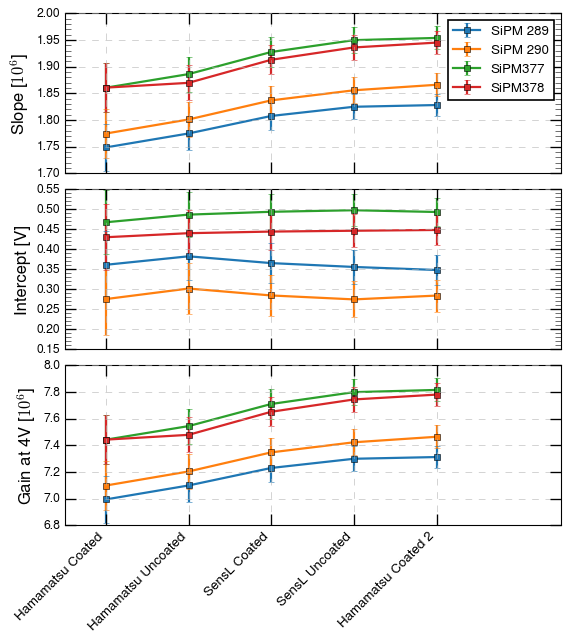

In [5]:

i=0;
fix_ov=4

fig, axs = plt.subplots(3,1,figsize=(8, 8),sharex=True,gridspec_kw={'hspace': 0.1})
# axs2 = axs1.twinx()

SiPMs_name=["SiPM 289","SiPM 290","SiPM377", "SiPM378"]

WEEKS= [
    "APSAIA_VUV",
    "APSAIA_VIS",
    "DAPHNE_VUV",
    "DAPHNE_VIS",
    "APSAIA_VUV_2"
]

WEEKS_label= [
    "Hamamatsu Coated",
    "Hamamatsu Uncoated",
    "SensL Coated",
    "SensL Uncoated",
    "Hamamatsu Coated 2"
]

import matplotlib.colors as mcolors

standard_colors = list(mcolors.TABLEAU_COLORS.keys())

for ch, col,sipm in zip([0,1,2,3], standard_colors,SiPMs_name):
    aux_OV = []
    aux_gain = []
    aux_m = []
    aux_m_err = []
    aux_intercept = []
    aux_intercept_err = []
    aux_gain_fixed = []
    
    for week in WEEKS:
        OVs = [3, 4, 5]
        gains = [GetGains(week, ch, OV, "GAIN")/1e6 for OV in OVs]
        for ov, gain in zip(OVs, gains):
            aux_OV.append(ov)
            aux_gain.append(gain)
            

        # Perform linear regression
        # coeffs = np.polyfit(aux_OV, aux_gain, 1)
        # x_intercep = -coeffs[1] / coeffs[0]
        data_x = np.array(aux_OV)
        data_y = np.array(aux_gain)
        data_yerr =data_y*0.01 #all calib data are equal or below 1% error

        least_squares =  LeastSquares(data_x, data_y, data_yerr, line)

        m = Minuit(least_squares, m=1, x0=0.2)  # starting values

        m.migrad()  # finds minimum of least_squares function
        m.hesse()   # accurately computes uncertainties
        
        intercept = m.values[1]
        val_at_OV = line(fix_ov+intercept, *m.values)

        aux_gain_fixed.append(val_at_OV)
        aux_m.append(m.values[0])
        aux_intercept.append(intercept)
        aux_m_err.append(m.errors[0])
        aux_intercept_err.append(m.errors[1])
    
    aux_m_err = np.array(aux_m_err)
    aux_m = np.array(aux_m)
    aux_intercept = np.array(aux_intercept)
    aux_intercept_err = np.array(aux_intercept_err)
    aux_gain_fixed = np.array(aux_gain_fixed)
    
    axs[0].errorbar (WEEKS_label, aux_m         ,aux_m_err                     , fmt="s-", color=col, label=sipm)
    axs[1].errorbar (WEEKS_label, aux_intercept ,aux_intercept_err             , fmt="s-", color=col )
    axs[2].errorbar (WEEKS_label, aux_gain_fixed,aux_m_err/aux_m*aux_gain_fixed, fmt="s-", color=col )
    
    i += 1

# axs[0].set_ylim(1.5, 2)
# axs[1].set_ylim(0.2, 1)
plt.xlim(-0.5, 5.5)
axs[2].set_xticklabels(WEEKS_label, rotation=45, ha="right",fontsize=12)

for i in range(3):axs[i].tick_params(axis='y', which='major', labelsize=11); axs[i].grid("both")
# axs1.grid("both")
# axs2.grid("both")
# # axs1.set_xlabel("Week")
axs[0].set_ylabel("Slope [$10^6$]"                 ,fontsize=15)
axs[1].set_ylabel("Intercept [V]"                  ,fontsize=15)
axs[2].set_ylabel("Gain at 4V [$10^6$]",            fontsize=15)
axs[0].legend(numpoints=1,loc="upper right",frameon=True)
plt.minorticks_off()
plt.show()

# XARAPUCA

## Each X-ARAPUCA, all weeks

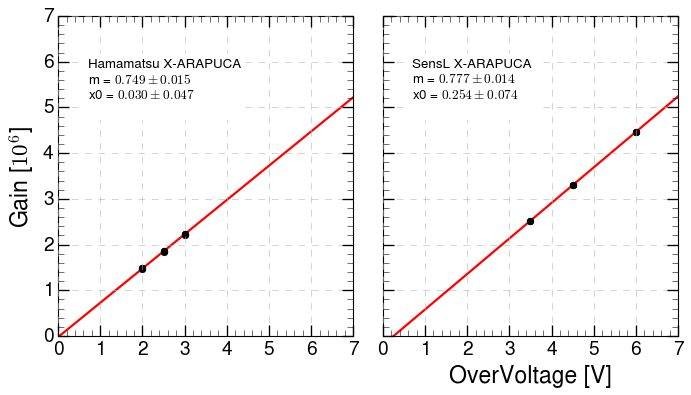

In [6]:

i=0;

fig,axs=plt.subplots(1, 2, figsize=(10, 5),sharex=True,sharey=True,gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

SiPMs_name=["Hamamatsu X-ARAPUCA","SensL X-ARAPUCA"]

WEEKS_XA= [
[    "APSAIA_VUV",
    "APSAIA_VUV_2",
    "APSAIA_VIS",
],
[
    "DAPHNE_VUV",
    "DAPHNE_VIS",
]
]


OVs_XA=[[2,2.5,3],[7,9,12]]

for ch,WEEKS,OVs in zip([4,4],WEEKS_XA,OVs_XA):

    
    # plt.subplot(2, 2, i)
    aux_OV   =[]
    aux_gain =[]
    
    for week in WEEKS:
        
        if week.__contains__("DAPHNE"):OVs=[7,9,12]
        gains=[ GetGains(week,ch,OV,"GAIN")/1e6 for OV in OVs]

        if week.__contains__("DAPHNE"):OVs=[ov/2 for ov in OVs]
        
        for ov, gain in zip(OVs,gains):
            aux_OV.append(ov)
            aux_gain.append(gain)
        

    # Perform linear regression
    data_x = np.array(aux_OV)
    data_y = np.array(aux_gain)
    data_yerr =data_y*0.01 #all calib data are equal or below 1% error

    least_squares =  LeastSquares(data_x, data_y, data_yerr, line)

    m = Minuit(least_squares, m=1, x0=0.2)  # starting values

    m.migrad()  # finds minimum of least_squares function
    m.hesse()   # accurately computes uncertainties

    # draw data and fitted line
    fit_info = [SiPMs_name[i]+"\n"];

    for p, v, e in zip(m.parameters, m.values, m.errors):
        fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$ \n")


    axs[i].errorbar(data_x, data_y, data_yerr, fmt="ok") 
    xs=np.arange(0,8)
    axs[i].plot(xs, line(xs, *m.values),color="red", label="Linear Fit")
    
    axs[i].text(0.1, 0.7, "".join(fit_info), fontsize=12, transform=axs[i].transAxes, bbox=dict(facecolor='white',edgecolor="white") )
    
    axs[i].grid("both")
    i+=1;
    
plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel("OverVoltage [V]")
axs[0].set_ylabel("Gain [$10^6$]");

## All weeks

/afs/ciemat.es/user/r/rodrigoa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning:

FixedFormatter should only be used together with FixedLocator



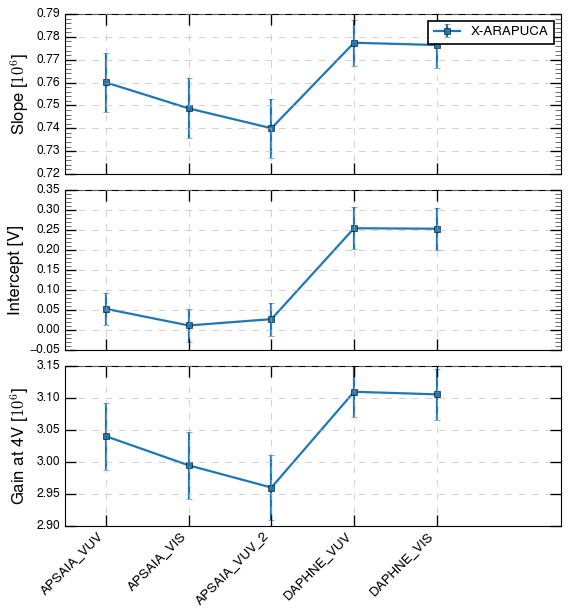

In [108]:

i=0;
fix_ov=4

fig, axs = plt.subplots(3,1,figsize=(8, 8),sharex=True,gridspec_kw={'hspace': 0.1})
# axs2 = axs1.twinx()

SiPMs_name=["X-ARAPUCA"]

WEEKS= [
    "APSAIA_VUV",
    "APSAIA_VIS",
    "APSAIA_VUV_2",
    "DAPHNE_VUV",
    "DAPHNE_VIS",
]

import matplotlib.colors as mcolors

standard_colors = list(mcolors.TABLEAU_COLORS.keys())

for ch, col,sipm in zip([4], standard_colors,SiPMs_name):
    
    aux_OV = []
    aux_gain = []
    aux_m = []
    aux_m_err = []
    aux_intercept = []
    aux_intercept_err = []
    aux_gain_fixed = []

    for week in WEEKS:
        
        OVs = [2, 2.5, 3]
        if week.__contains__("DAPHNE"):OVs=[7,9,12]
        gains = [GetGains(week, ch, OV, "GAIN")/1e6 for OV in OVs]
        
        if week.__contains__("DAPHNE"):OVs=[ov/2 for ov in OVs];
        for ov, gain in zip(OVs, gains):
            aux_OV.append(ov)
            aux_gain.append(gain)
            

        # Perform linear regression
        # coeffs = np.polyfit(aux_OV, aux_gain, 1)
        # x_intercep = -coeffs[1] / coeffs[0]
        data_x = np.array(OVs)
        data_y = np.array(gains)
        data_yerr =data_y*0.005 #all calib data are equal or below 1% error

        least_squares =  LeastSquares(data_x, data_y, data_yerr, line)

        p0=[0.75,0]
        
        m = Minuit(least_squares, m=p0[0], x0=p0[1] )  # starting values

        m.migrad()  # finds minimum of least_squares function
        m.hesse()   # accurately computes uncertainties
        
        intercept = m.values[1]
        val_at_OV = line(fix_ov+intercept, *m.values)

        aux_gain_fixed.append(val_at_OV)
        aux_m.append(m.values[0])
        aux_intercept.append(intercept)
        aux_m_err.append(m.errors[0])
        aux_intercept_err.append(m.errors[1])
    
    aux_m_err = np.array(aux_m_err)
    aux_m = np.array(aux_m)
    aux_intercept = np.array(aux_intercept)
    aux_intercept_err = np.array(aux_intercept_err)
    aux_gain_fixed = np.array(aux_gain_fixed)
    
    axs[0].errorbar (WEEKS, aux_m         ,aux_m_err                     , fmt="s-", color=col, label=sipm)
    axs[1].errorbar (WEEKS, aux_intercept ,aux_intercept_err             , fmt="s-", color=col )
    axs[2].errorbar (WEEKS, aux_gain_fixed,aux_m_err/aux_m*aux_gain_fixed, fmt="s-", color=col )
    
    i += 1

# axs[0].set_ylim(1.5, 2),0]
        
        # m = Minuit(least_squares, m=p0[0], x0=p0[1] )  # starting values

# axs[1].set_ylim(0.2, 1)
plt.xlim(-0.5, 5.5)
axs[2].set_xticklabels(WEEKS, rotation=45, ha="right",fontsize=12)

for i in range(3):axs[i].tick_params(axis='y', which='major', labelsize=11); axs[i].grid("both")
# axs1.grid("both")
# axs2.grid("both")
# # axs1.set_xlabel("Week")
axs[0].set_ylabel("Slope [$10^6$]"                 ,fontsize=15)
axs[1].set_ylabel("Intercept [V]"                  ,fontsize=15)
axs[2].set_ylabel("Gain at 4V [$10^6$]",            fontsize=15)
axs[0].legend(numpoints=1,loc="upper right",frameon=True)
plt.minorticks_off()
plt.show()